In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Set random seed for reproducibility
np.random.seed(40)

# Function to generate mock data for tasks and robots
def generate_mock_data(num_tasks=10, num_robots=5):
    task_durations = np.random.randint(1, 11, size=num_tasks)  # Random task durations between 1 and 10 hours
    task_priorities = np.random.randint(1, 6, size=num_tasks)  # Random task priorities between 1 and 5
    robot_efficiencies = np.random.uniform(0.7, 1.5, size=num_robots)  # Random robot efficiencies between 0.5 and 1.5
    return task_durations, task_priorities, robot_efficiencies


In [18]:
def fitness_function(population, task_durations, task_priorities, robot_efficiencies):
    fitness =[]
    total_robot = len(robot_efficiencies)
    for i in range(len(population)): 
        present_population = population[i]
        Tr = np.zeros(total_robot, dtype=int)
        for j in range(len(present_population)):
            task = j 
            robot = present_population[task]
            td_robot = task_durations[task]
            tp_robot = task_priorities[task]
            re_robot = robot_efficiencies[robot]
            Tr[robot] = Tr[robot] + ((td_robot * tp_robot) / re_robot)
        Ttotal = np.max(Tr)
        B = np.std(Tr)
        fitness.append(Ttotal + B)
    return fitness



In [19]:
def select_parents(population, fitness):
    num_parents = int(len(population)/2)
    parents = []

    for _ in range(num_parents):
        min_fitness_idx = np.argmin(fitness)
        parents.append(population[min_fitness_idx])
        fitness[min_fitness_idx] = np.inf  # so this individual is not selected again

    return parents


In [20]:
def crossover(parents, num_offspring):
    # Single point crossover
    offspring = []
    for _ in range(num_offspring):
        crossover_point = np.random.randint(1, len(parents[0]))  
        parent1_idx = np.random.randint(0, len(parents))
        parent2_idx = np.random.randint(0, len(parents))
        offspring_part1 = parents[parent1_idx][0:crossover_point]
        offspring_part2 = parents[parent2_idx][crossover_point:]
        offspring2_part1 = parents[parent2_idx][0:crossover_point]
        offspring2_part2 = parents[parent1_idx][crossover_point:]
        offspring.append(np.concatenate((offspring_part1, offspring_part2)))
        offspring.append(np.concatenate((offspring2_part1, offspring2_part2)))

    return offspring


In [21]:
def mutation(offspring, mutation_rate, robot_efficiencies):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(len(offspring)):
        for _ in range(int(len(offspring[idx])*mutation_rate)):
            # mutation_gene = np.random.randint(0, len(offspring[idx]))

            # new_value = np.random.randint(0, len(robot_efficiencies))
            # offspring[idx][mutation_gene] = new_value
            T1 = np.random.randint(0, len(offspring[idx]))
            T2 = np.random.randint(0, len(offspring[idx]))
            offspring[idx][T1], offspring[idx][T2] = offspring[idx][T2] , offspring[idx][T1]
    return offspring


In [22]:

# GA algorithm placeholder for students to implement their solution
def run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies):
    population_size = 100
    generation = 1000 
    mutation_rate = 0.1

    # Placeholder for the initial population generation
    population = [np.random.randint(0, len(robot_efficiencies), size=len(task_durations)) for _ in range(population_size)]
    for _ in range(generation):
        # Placeholder for the fitness function calculation
        fitness = fitness_function(population, task_durations, task_priorities, robot_efficiencies)
        
        # Placeholder for the selection process
        parents = select_parents(population, fitness)
        
        # Placeholder for the crossover operation
        offspring = crossover(parents, int(population_size / 2 ))
        # # Placeholder for the mutation operation

        # Create the new population by combining parents and offspring
        # population = parents + offspring
        
        population = mutation(offspring, mutation_rate, robot_efficiencies)
    # Example of a random solution for demonstration purposes

    fitness = fitness_function(population, task_durations, task_priorities, robot_efficiencies)
        
    
    print(fitness[np.argmin(fitness)])
    best_solution = population[np.argmin(fitness)]
    
    return best_solution

In [23]:
def visualize_assignments_improved(solution, task_durations, task_priorities, robot_efficiencies):
    # Create a grid for visualization based on the solution provided
    grid = np.zeros((len(robot_efficiencies), len(task_durations)))
    for task_idx, robot_idx in enumerate(solution):
        grid[robot_idx, task_idx] = task_durations[task_idx]

    fig, ax = plt.subplots(figsize=(12, 6))
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "blue"])  # Custom colormap

    # Display the grid with task durations
    cax = ax.matshow(grid, cmap=cmap)
    fig.colorbar(cax, label='Task Duration (hours)')

    # Annotate each cell with task priority and duration
    for i in range(len(task_durations)):
        for j in range(len(robot_efficiencies)):
            text_color = 'white' if grid[j, i] > 0 and task_durations[i] >= 5 else 'black' 
            ax.text(i, j, f'P{task_priorities[i]}\n{task_durations[i]}H', va='center', ha='center', color=text_color)


    # Set the ticks and labels for tasks and robots
    ax.set_xticks(np.arange(len(task_durations)))
    ax.set_yticks(np.arange(len(robot_efficiencies)))
    ax.set_xticklabels([f'Task {i+1}' for i in range(len(task_durations))], rotation=45, ha="left")
    ax.set_yticklabels([f'Robot {i+1} (Efficiency: {eff:.2f})' for i, eff in enumerate(robot_efficiencies)])

    plt.xlabel('Tasks')
    plt.ylabel('Robots')
    plt.title('Task Assignments with Task Duration and Priority')

    # Create a legend for task priorities
    priority_patches = [mpatches.Patch(color='white', label=f'Priority {i}') for i in range(1, 6)]
    plt.legend(handles=priority_patches, bbox_to_anchor=(1.20, 1), loc='upper left', title="Task Priorities")

    plt.tight_layout()
    plt.show()


47.86324076875773
[6 6 5 0 7 0 3 1 4 1 8 9 2 9 6]


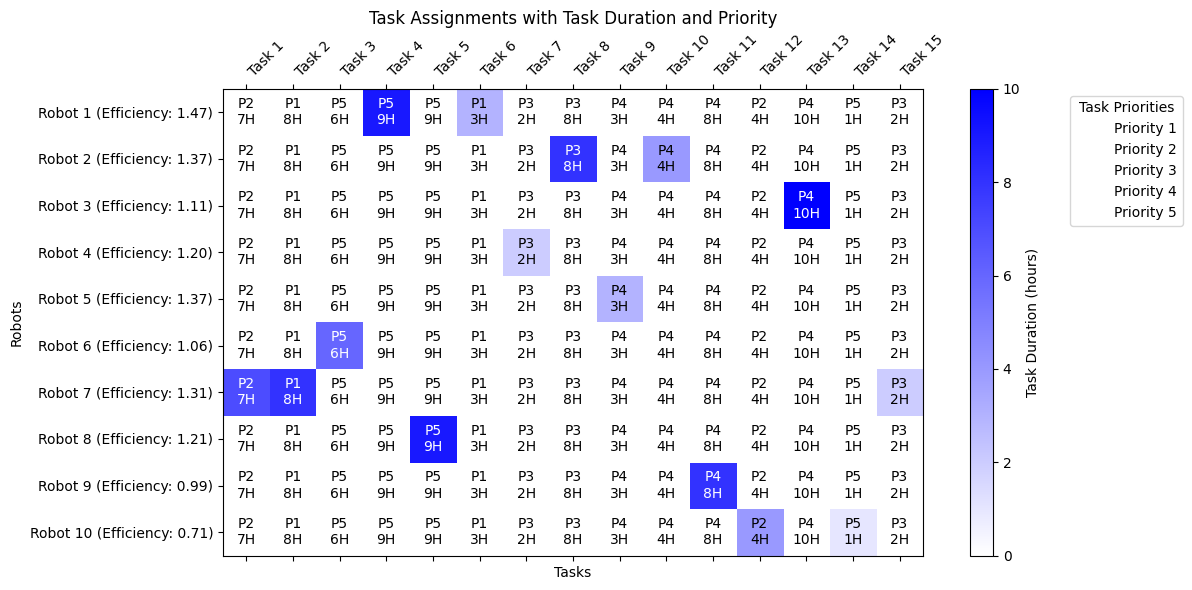

In [24]:
# Main execution
if __name__ == "__main__":
    num_tasks = 15
    num_robots = 10
    task_durations, task_priorities, robot_efficiencies = generate_mock_data(num_tasks, num_robots)

    # Run GA to find the best solution
    best_solution = run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies)
    print(best_solution)
    
    # Visualize the initial random assignment
    visualize_assignments_improved(best_solution, task_durations, task_priorities, robot_efficiencies)
